In [8]:
import numpy as np 
import pandas as pd
from scipy.integrate import trapz as tp 
from funcs.aflare1 import aflare1
from funcs.blackbody_model import _brightness_mod

In [9]:
#load muscat response
muscat = pd.read_csv("../data/MuSCAT2_response/MuSCAT2_response.csv")

#fill NAN add lamb column
muscat = muscat.fillna(0) 
muscat["lamb"] = muscat.wavelength*1e1   #Angstrom
wavelength = muscat.wavelength * 1e-9

In [10]:
#load caluclated apparent brightness for trappist-1 and SED from trappist1 (Wilson et al 2021)

trappist = np.genfromtxt("../results/values/brightness_TRAPPIST-1.txt", delimiter= ",", skip_header=1)
trappist_SED = np.genfromtxt("../data/TRAPPIST1_Semimodel_Wilson/TRAPPIST-1_model_const_res_v07.ecsv")
#trappistflux_M2 = np.genfromtxt("../results/values/brightness_TRAPPIST-1_withCCDeffeciency.txt", delimiter= ",", skip_header=1)

In [11]:
wavelength_SED, flux_SED = trappist_SED[:,0]*1e-10, trappist_SED[:,1]

#flux is in erg cm-2 -s A

#Import M2 response, passband limits
iters = ["g", "r", "i", "z"]
limit, wavelength_M2, response_M2 = [], [], []

for i in iters: 
    #limit are the limits of the passband in wavelength 
    limit.append(np.load("../data/MuSCAT2_response/MuSCAT2_limit_{}.npy".format(str(i))))
    wavelength_M2.append(np.load("../data/MuSCAT2_response/MuSCAT2_wavelength_{}.npy".format(str(i))))
    response_M2.append(np.load("../data/MuSCAT2_response/MuSCAT2_response_{}_bandpass.npy".format(str(i))))

In [12]:
import astropy.units as u 
flux_SED = flux_SED * u.erg * u.s**(-1) *u.cm**(-2) * u.Angstrom**(-1)
flux_SED = flux_SED.to("W m^-3")
flux_SED = flux_SED.value

import astropy.constants as ca 
t_star = 2648 #[K] #Wilson et al 2021
r_star = 0.1192 * ca.R_sun.value
dist_star = dist_TRAP = 3.835084e+17 #[m]

In [13]:
flare_SED = _brightness_mod(wavelength_SED, limit, 7000, 1e-5, flux_SED, t_star, r_star, dist_star)

In [14]:
flare_SED_error = flare_SED * 0.5

In [ ]:

#1. Blackbody mit T und a 
#2. Convolve with muscat filters to yield flare values

#dafür von Temperature und area zu brightness sonst macht es keinen Sinn

In [2]:
import pandas as pd
#import data frames with the flare parameters of davenport model (ampl, fwhm, tpeak)
#fitted by emcee approach McKey 2013 



<ErrorbarContainer object of 3 artists>

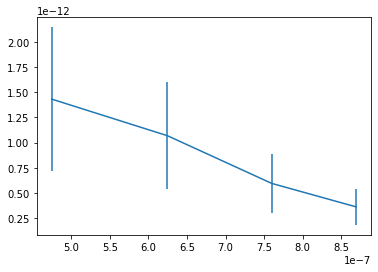

In [15]:
import matplotlib.pyplot as plt 

plt.errorbar(wavelength_M2,flare_SED, yerr = flare_SED_error)

In [16]:
with open("Test/results/values/brightness_flare_Test.txt", "w+") as f:
    f.write("g , r , i, z, unit: [None] \n")
    f.write(str(flare_SED[0])+ ',' +  str(flare_SED[1])+ ',' + \
            str(flare_SED[2])+ ',' + str(flare_SED[3]) + '\n' )

    
